## Detecting Edge Frequency

### Can Be used to reduce the classes based of class characteristics 

#### E.g. Cubism Has a relatively higher frequency count

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage as ndi
import collections
from skimage import feature
import scipy.misc
from PIL import Image

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.


10400


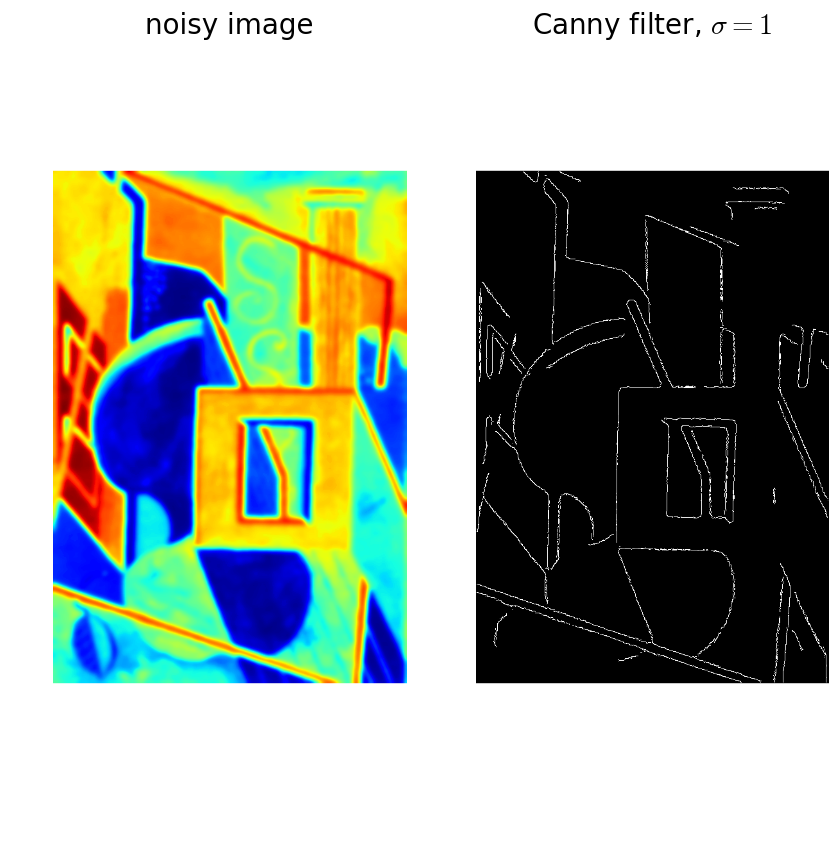

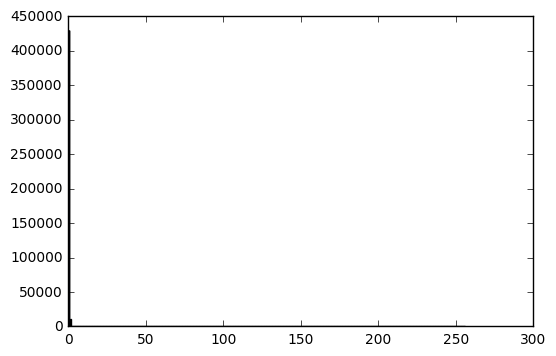

In [2]:
class EdgeFrequecy:
    def __init__(self):
        pass
    
    def saveToFile(self,image_array):
        scipy.misc.imsave('edges.jpg', image_array)
        self.returnCount("edges.jpg")
    def detectEdges(self,filename):
        im = cv2.imread(filename,0)
        #im = ndi.rotate(im, 15, mode='constant')
        im = ndi.gaussian_filter(im, 4)
        im += 0.2 * np.random.random(im.shape)

        # Compute the Canny filter for two values of sigma
        edges1 = feature.canny(im,sigma=1)
        
        self.saveToFile(edges1)
        
        # display results
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10), sharex=True, sharey=True)

        ax1.imshow(im, cmap=plt.cm.jet)
        ax1.axis('off')
        ax1.set_title('noisy image', fontsize=20)

        ax2.imshow(edges1, cmap=plt.cm.gray)
        ax2.axis('off')
        ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

        plt.show()
        plt.hist(edges1.ravel(),256,[0,256]);plt.show()
        
    def returnCount(self,image_file):
        im_gray = cv2.imread(image_file, cv2.CV_LOAD_IMAGE_GRAYSCALE)
        (thresh, im_bw) = cv2.threshold(im_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        cv2.imwrite('bw_image.png', im_bw)
        im_f=Image.open('bw_image.png')
        #im_f=Image.open(image_file)
        white=0
        for pixel in im_f.getdata():
            if(pixel>0):
                white+=1
        print white
        
        
        
obj=EdgeFrequecy()
obj.detectEdges("test.jpg")